In [4]:
# Kütüphaneler
import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [31]:
# Veri setini yükleyin
df = pd.read_csv("kc_house_data.csv")

# Veri setinin boyutunu kontrol edin
print(f"Veri seti boyutu: {df.shape}")

# Eksik değerleri kontrol edin
print(f"Eksik değerler: {df.isnull().sum().sum()}")

Veri seti boyutu: (21613, 21)
Eksik değerler: 0


In [28]:
# ----------------------------
# Veri Ön İşleme
# ----------------------------

# Date sütununu datetime formatına dönüştürme
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Ev yaşı hesaplama
df['house_age'] = 2023 - df['yr_built']

# One-Hot Encoding (OHE) - zipcode için
# df = pd.get_dummies(df, columns=['zipcode'], drop_first=True)

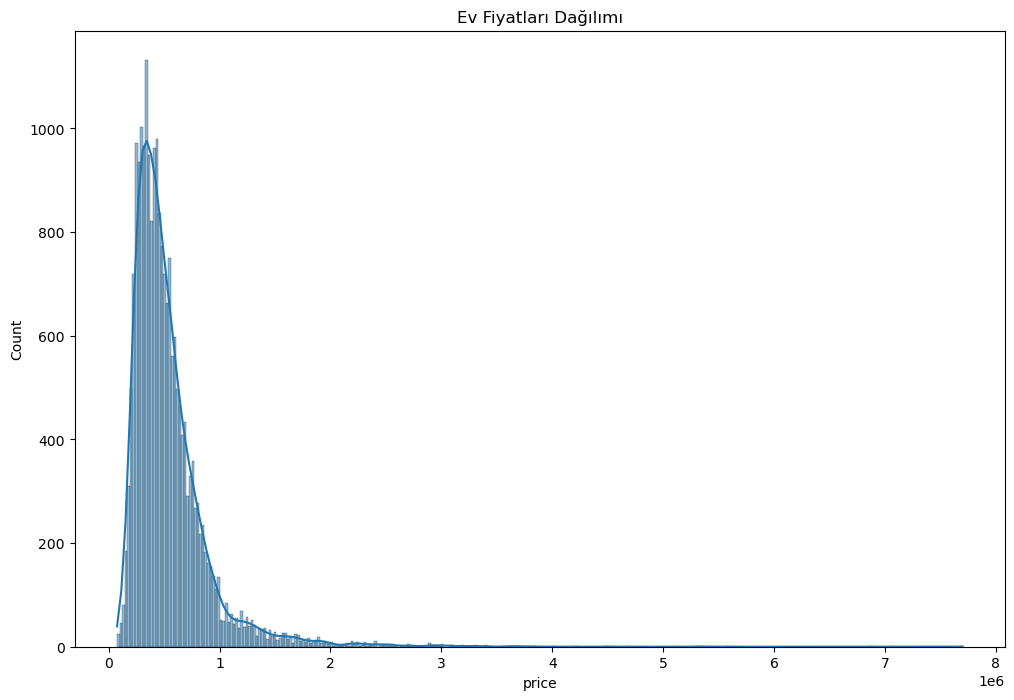

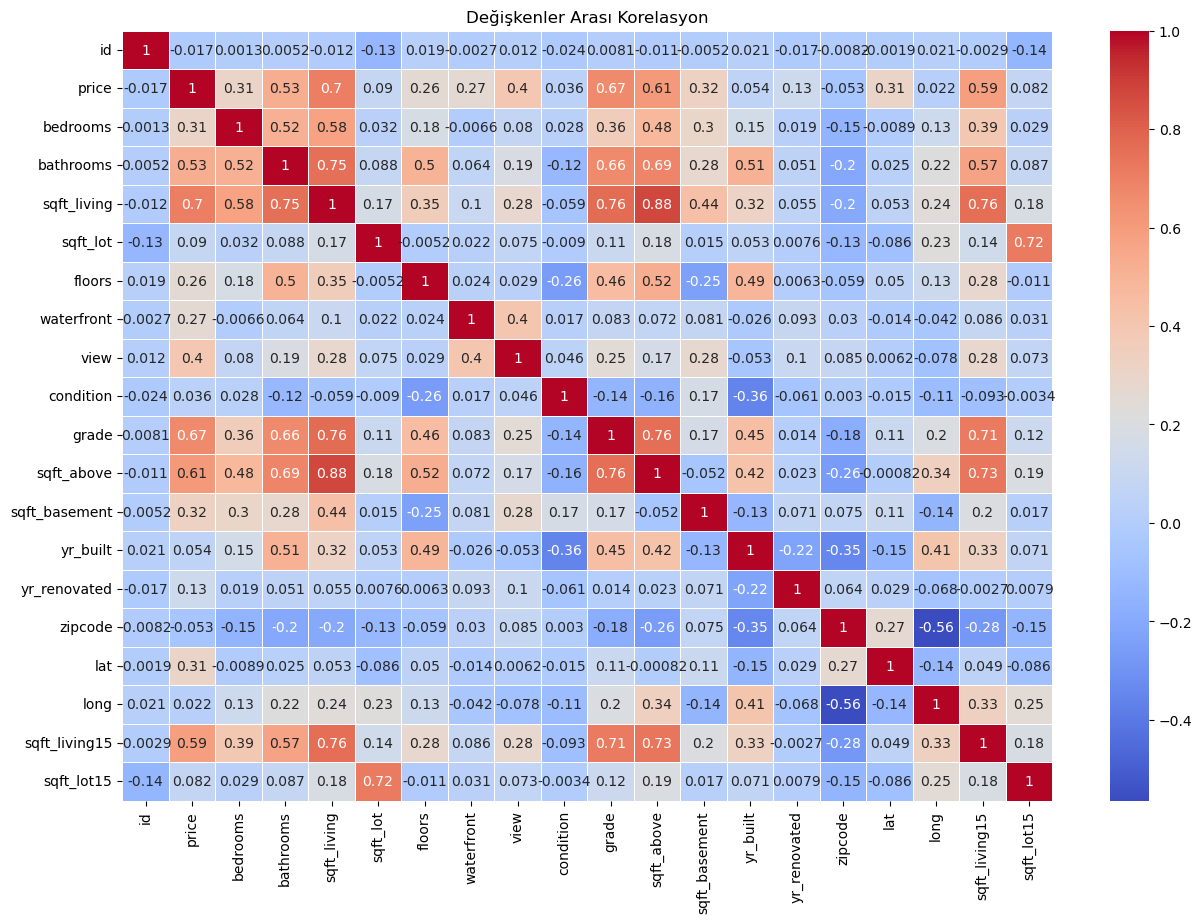

       bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
6325          3       1.75         1780     13095     1.0           0     0   
13473         2       1.00         1000      3700     1.0           0     0   
17614         3       1.00         1080      7486     1.5           0     0   
16970         3       2.25         2090      7500     1.0           0     0   
20868         2       2.50         1741      1439     2.0           0     0   
...         ...        ...          ...       ...     ...         ...   ...   
11964         3       1.50         1000      6914     1.0           0     0   
21575         3       2.50         3087      5002     2.0           0     0   
5390          3       2.50         2120      4780     2.0           0     0   
860           1       0.75          380     15000     1.0           0     0   
15795         4       2.50         3130      5999     2.0           0     0   

       condition  grade  sqft_above  sqft_basement 

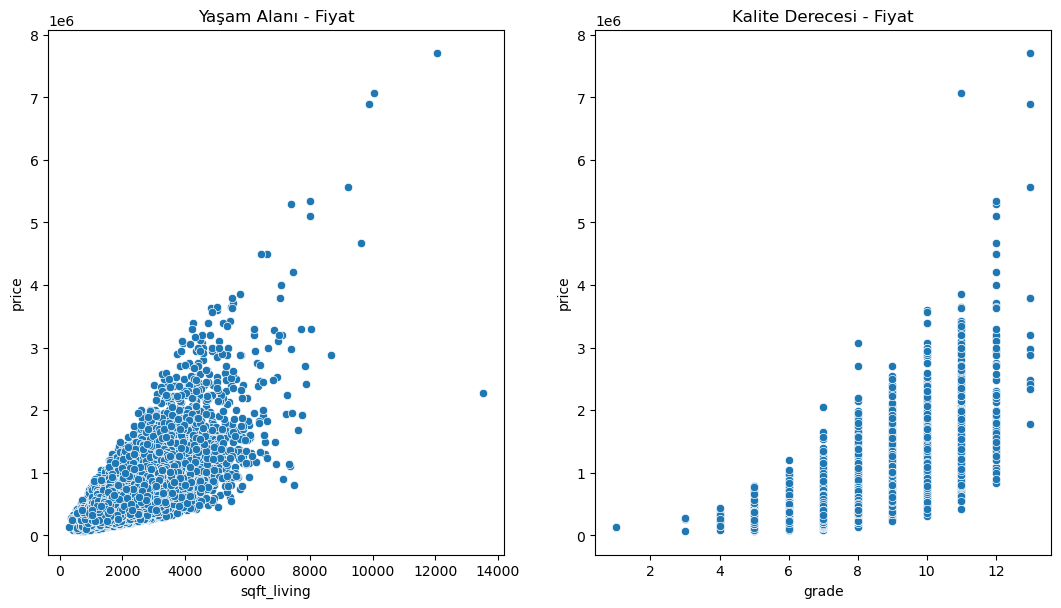

In [32]:
# ----------------------------
# Veri Görselleştirme
# ----------------------------

# Ev Fiyatları Dağılımı
plt.figure(figsize=(12, 8))
sns.histplot(df['price'], kde=True)
plt.title('Ev Fiyatları Dağılımı')
plt.show()

# Korelasyon analizi (OHE'den sonra yapılmalı)
plt.figure(figsize=(15, 10))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Değişkenler Arası Korelasyon')
plt.show()

# Fiyat ve diğer özellikler arasındaki ilişki 
plt.figure(figsize=(20, 15))
plt.subplot(2, 3, 1)
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.title('Yaşam Alanı - Fiyat')

plt.subplot(2, 3, 2)
sns.scatterplot(x='grade', y='price', data=df)
plt.title('Kalite Derecesi - Fiyat')

# ----------------------------
# Eğitim ve test verisine ayırma
# ----------------------------
from sklearn.model_selection import train_test_split
X = df.drop(['price', 'id', 'date'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
# Model eğitimi
# ...

# Model değerlendirmesi
# ...